In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("../../first_exo/concrete_strength_dataset.csv")

In [9]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [34]:
from keras.models import Sequential
from keras.layers import Dense

In [13]:
# split into input (X) and output (y) variables
X = df[['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age']]
y = df["Strength"]

In [29]:
# Select ratio
ratio = 0.70
  
total_rows = df.shape[0]
train_size = int(total_rows*ratio)
  
# Split data into test and train
train = df[0:train_size]
test = df[train_size:]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0, random_state=42)

In [32]:

# example of a standardization
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)
print(scaled)

[[ 2.51565257 -0.8609005  -0.84743422 ... -1.26854248 -0.30616166
   2.41147439]
 [ 2.51565257 -0.8609005  -0.84743422 ... -1.26854248 -0.30616166
   1.38990581]
 [ 0.47811169  0.7693747  -0.84743422 ... -2.25814186  3.26754046
   0.16966754]
 ...
 [-1.58299592  1.24301254 -0.84743422 ...  0.22913171 -0.61627631
  -1.51902483]
 [-1.14897517  2.00151953 -0.84743422 ... -1.06820895  0.60941491
   0.35592038]
 [-0.78860047  2.63189261 -0.84743422 ... -1.8236836   0.60941491
   0.82381007]]


In [35]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='relu'))

In [ ]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [36]:
...
# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
...

Ellipsis

In [ ]:
print(df[0:6:])

   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   
5   266.0               114.0      0.0  228.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30  
5             932.0           670.0   90     47.03  


In [ ]:
from keras.callbacks import EarlyStopping

stp = EarlyStopping(
        monitor="val_loss",
        min_delta=0,
        patience=0,
        verbose=1,
        mode="auto",
        baseline=None,
        restore_best_weights=False,
)

In [ ]:
...
# fit the keras model on the dataset
history = model.fit(X, y,epochs=1500, batch_size=32)
...
# ,validation_split=0.33,callbacks=EarlyStopping(monitor='val_loss')

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error'])


dict_keys(['loss', 'mean_absolute_error'])


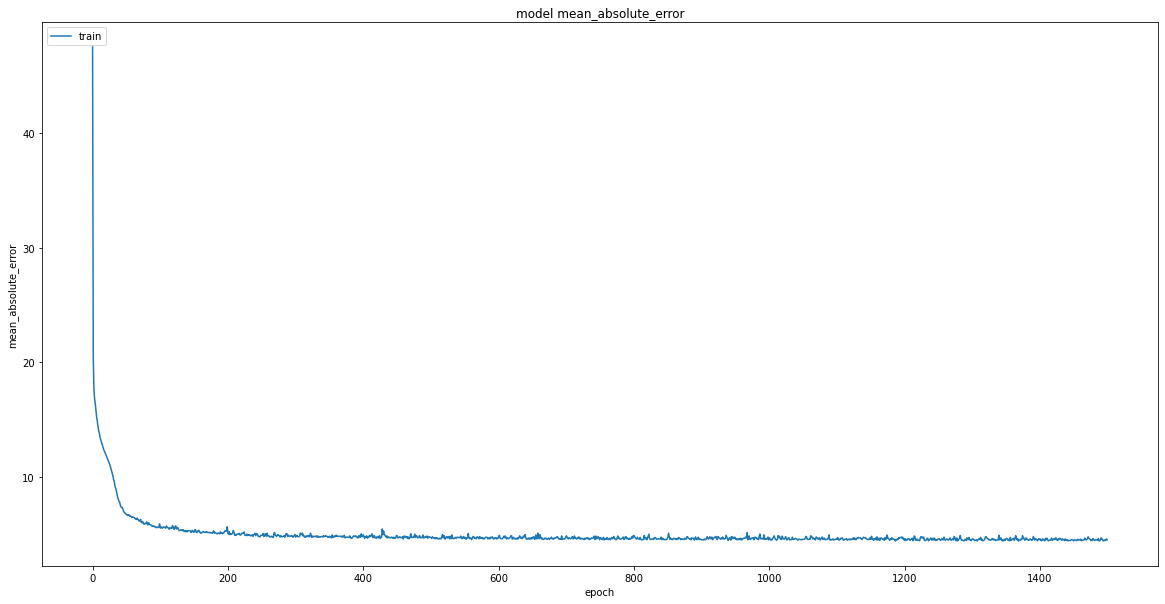

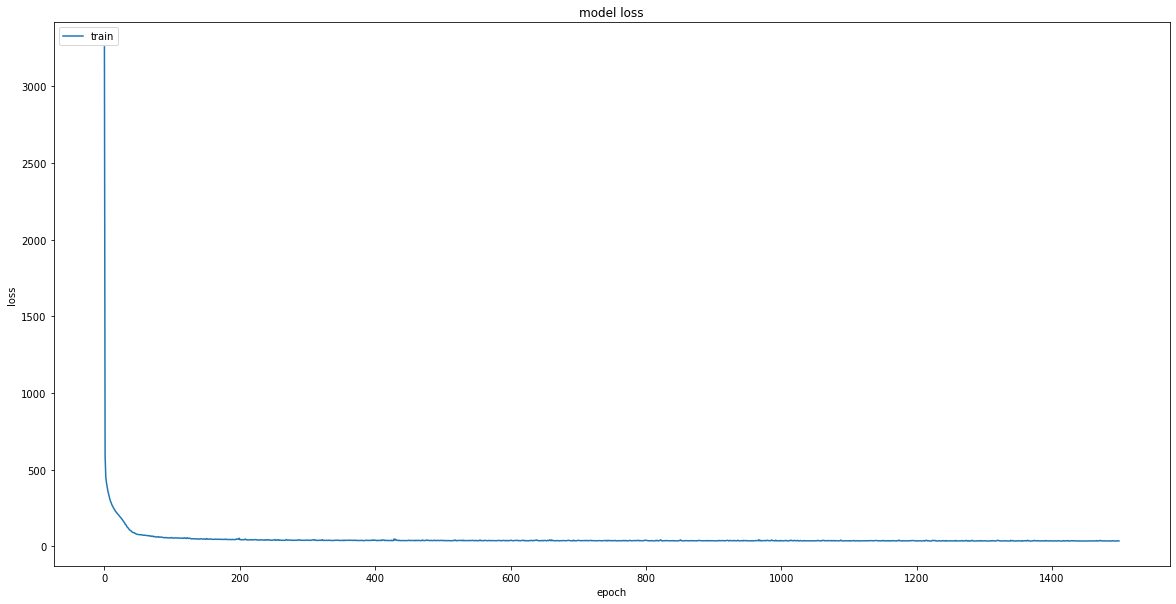

In [ ]:
# list all data in history
print(history.history.keys())
plt.figure(figsize=(20,10))
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
# plt.plot(history.history['loss'])
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print(r2_score(y_test,y_pred))

0.8547621189252773


In [ ]:


# instantiate Sequential model
model = Sequential()
# Build the model by adding dense layers
# Input layer (mandatory) with number of features as input dimension
model.add(Dense(12, input_dim=8, activation='relu'))
# hidden layers (optional)
model.add(Dense(8, activation='relu'))
# output layer (mandatory) with an activation function related to the task
# regression
model.add(Dense(1, activation='linear'))
# binary classification
model.add(Dense(1, activation='sigmoid'))
# multiclass classification
model.add(Dense(1, activation='softmax'))
# Compile the model
model.compile(loss=..., optimizer=..., metrics=... )
# Train the model 
model.fit(X, y, batch_size=..., epochs=...)
# Watch the number parameters
model.summary()